In [12]:
import keras_tuner as kt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt


In [13]:
data = np.loadtxt("IT-Equipment.csv", delimiter="\t", skiprows=1) 

In [14]:
y=data[:,0:4]
X=data[:,4]
X.shape

(891,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([0.00106164, 0.00191095, 0.00138013, 0.00201711, 0.00159246,
        0.00148629, 0.00084931, 0.00138013, 0.00074315, 0.00106164,
        0.00084931, 0.00095548, 0.00074315, 0.00063698, 0.00021233,
        0.00031849, 0.00042466, 0.00031849, 0.00031849, 0.00010616,
        0.00010616, 0.        , 0.        , 0.00021233, 0.00010616,
        0.        , 0.00010616, 0.        , 0.        , 0.00010616]),
 array([   4.52      ,   57.14233333,  109.76466667,  162.387     ,
         215.00933333,  267.63166667,  320.254     ,  372.87633333,
         425.49866667,  478.121     ,  530.74333333,  583.36566667,
         635.988     ,  688.61033333,  741.23266667,  793.855     ,
         846.47733333,  899.09966667,  951.722     , 1004.34433333,
        1056.96666667, 1109.589     , 1162.21133333, 1214.83366667,
        1267.456     , 1320.07833333, 1372.70066667, 1425.323     ,
        1477.94533333, 1530.56766667, 1583.19      ]),
 <BarContainer object of 30 artists>)

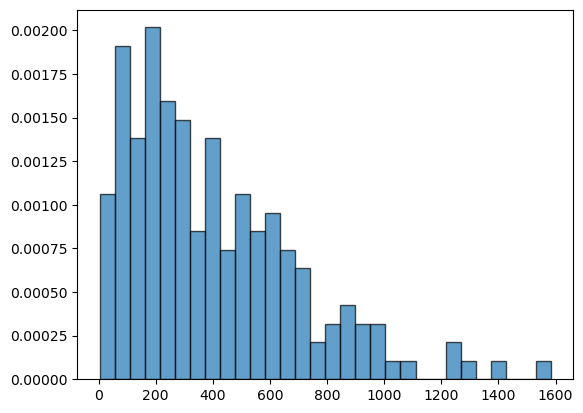

In [16]:
plt.hist(X_test, bins=30, edgecolor='black', alpha=0.7, density=True)

In [17]:
scaler1=StandardScaler()
scaler2=StandardScaler()

In [18]:
X_train=scaler1.fit_transform(X_train.reshape(-1,1))
y_train=scaler2.fit_transform(y_train)
X_test=scaler1.transform(X_test.reshape(-1,1))
y_test=scaler2.transform(y_test)
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)


In [19]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=10, default=1)
    n_neurons = hp.Int("n_neurons", min_value=20, max_value=1000,step=10)
    learning_rate = hp.Float("learning_rate", min_value=1e-5, max_value=1,
    sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(4))
    model.compile(loss="mse", optimizer=optimizer,
        metrics=[r2_score])
    return model

In [20]:

r2_score=tfa.metrics.RSquare()

In [21]:
random_search_tuner = kt.RandomSearch(
build_model, objective=kt.Objective("val_r_square", direction="max"), max_trials=200, overwrite=True,
directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
validation_data=(X_test, y_test))

Trial 200 Complete [00h 00m 08s]
val_r_square: 0.41517162322998047

Best val_r_square So Far: 0.4658397436141968
Total elapsed time: 00h 27m 18s


In [22]:
top3_models = random_search_tuner.get_best_models(num_models=5)

In [23]:
best_model = top3_models[0]

In [24]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=5)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 760,
 'learning_rate': 0.003821132060292563,
 'optimizer': 'adam'}

In [25]:
lr_callback = ReduceLROnPlateau(monitor='loss', factor=0.9, patience=20, min_lr=1e-6)
callbacks=[lr_callback]

In [26]:
best_model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
23/23 [==============================] - 1s 21ms/step - loss: 0.5430 - r_square: 0.4487 - val_loss: 0.5857 - val_r_square: 0.4230
Epoch 2/500
23/23 [==============================] - 0s 15ms/step - loss: 0.5566 - r_square: 0.4434 - val_loss: 0.5458 - val_r_square: 0.4616
Epoch 3/500
23/23 [==============================] - 0s 14ms/step - loss: 0.5513 - r_square: 0.4487 - val_loss: 0.5463 - val_r_square: 0.4608
Epoch 4/500
23/23 [==============================] - 0s 14ms/step - loss: 0.5365 - r_square: 0.4635 - val_loss: 0.5358 - val_r_square: 0.4714
Epoch 5/500
23/23 [==============================] - 0s 14ms/step - loss: 0.5284 - r_square: 0.4716 - val_loss: 0.6176 - val_r_square: 0.3919
Epoch 6/500
23/23 [==============================] - 0s 15ms/step - loss: 0.5659 - r_square: 0.4341 - val_loss: 0.5479 - val_r_square: 0.4595
Epoch 7/500
23/23 [==============================] - 0s 14ms/step - loss: 0.5414 - r_square: 0.4586 - val_loss: 0.5339 - val_r_square: 0.4724
Epoch 

In [27]:
best_model1 = tf.keras.Sequential([
tf.keras.layers.Input(X_train.shape[1]),
tf.keras.layers.Dropout(rate=0.0),
tf.keras.layers.Dense(760, activation="relu"),
tf.keras.layers.Dropout(rate=0.0),
tf.keras.layers.Dense(760, activation="relu"),
tf.keras.layers.Dropout(rate=0.0),
tf.keras.layers.Dense(760, activation="relu"),
tf.keras.layers.Dropout(rate=0.0),  
tf.keras.layers.Dense(780, activation="relu"),  
tf.keras.layers.Dropout(rate=0.0),
tf.keras.layers.Dense(4)
])

In [35]:
best_model1.compile(loss="mse",optimizer=keras.optimizers.Adam(learning_rate=0.003821132060292563),metrics=[tfa.metrics.RSquare()
])

In [36]:
lr_callback = ReduceLROnPlateau(monitor='loss', factor=0.9, patience=20, min_lr=1e-6)
callbacks=[lr_callback]

In [37]:
history=best_model1.fit(X_train,y_train,batch_size=32,epochs=500,validation_data=(X_test,y_test),callbacks=[lr_callback])

Epoch 1/500
23/23 [==============================] - 2s 34ms/step - loss: 0.5809 - r_square: 0.4191 - val_loss: 0.4795 - val_r_square: 0.5289 - lr: 0.0038
Epoch 2/500
23/23 [==============================] - 1s 26ms/step - loss: 0.4076 - r_square: 0.5924 - val_loss: 0.4374 - val_r_square: 0.5689 - lr: 0.0038
Epoch 3/500
23/23 [==============================] - 1s 26ms/step - loss: 0.4336 - r_square: 0.5664 - val_loss: 0.4759 - val_r_square: 0.5314 - lr: 0.0038
Epoch 4/500
23/23 [==============================] - 1s 25ms/step - loss: 0.3839 - r_square: 0.6161 - val_loss: 0.3594 - val_r_square: 0.6457 - lr: 0.0038
Epoch 5/500
23/23 [==============================] - 1s 26ms/step - loss: 0.4062 - r_square: 0.5938 - val_loss: 0.4327 - val_r_square: 0.5739 - lr: 0.0038
Epoch 6/500
23/23 [==============================] - 1s 26ms/step - loss: 0.3573 - r_square: 0.6427 - val_loss: 0.3930 - val_r_square: 0.6128 - lr: 0.0038
Epoch 7/500
23/23 [==============================] - 1s 26ms/step - lo

In [38]:
best_model1.evaluate(X_test,y_test)

6/6 [==============================] - 0s 8ms/step - loss: 0.1985 - r_square: 0.8039


[0.1985246241092682, 0.8039441704750061]

In [39]:
val_r_square=history.history['val_r_square']
r_square=history.history['r_square']
val_loss=history.history['val_loss']
loss=history.history['loss']


In [40]:
idx=[i+1 for i in range(500)]

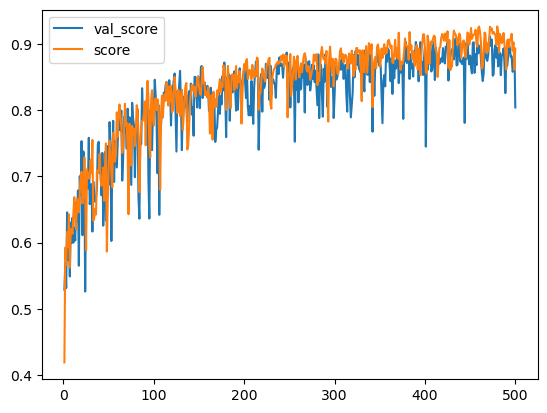

In [41]:
plt.plot(idx,val_r_square,label='val_score')
plt.plot(idx,r_square,label='score')
plt.legend()

In [42]:
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=20, min_lr=1e-6)

In [ ]:
best_model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[lr_callback])

Epoch 1/500
23/23 [==============================] - 1s 20ms/step - loss: 0.1266 - r_square: 0.8734 - val_loss: 0.1767 - val_r_square: 0.8264 - lr: 0.0038
Epoch 2/500
23/23 [==============================] - 0s 17ms/step - loss: 0.1247 - r_square: 0.8753 - val_loss: 0.1715 - val_r_square: 0.8313 - lr: 0.0038
Epoch 3/500
23/23 [==============================] - 0s 17ms/step - loss: 0.1184 - r_square: 0.8816 - val_loss: 0.2088 - val_r_square: 0.7951 - lr: 0.0038
Epoch 4/500
23/23 [==============================] - 0s 18ms/step - loss: 0.1814 - r_square: 0.8186 - val_loss: 0.1719 - val_r_square: 0.8301 - lr: 0.0038
Epoch 5/500
23/23 [==============================] - 0s 18ms/step - loss: 0.1363 - r_square: 0.8637 - val_loss: 0.1361 - val_r_square: 0.8658 - lr: 0.0038
Epoch 6/500
23/23 [==============================] - 0s 19ms/step - loss: 0.1401 - r_square: 0.8599 - val_loss: 0.1882 - val_r_square: 0.8150 - lr: 0.0038
Epoch 7/500
23/23 [==============================] - 0s 22ms/step - lo

In [ ]:
best_model.evaluate(X_test,y_test)